# Imbalanced data

In this exercise we will have a look at the problems we may face in case of an imbalanced dataset as well as some of the solutions. 

The data consist of 2 continuous features ``X1`` and ``X2`` and one binary label ``y``. 

$y$ could be seen as the result of a medical test the label ``0`` meaning that you are positive (ill) and the label ``1`` means that you are negative (healthy). Generally, in this situation there are much more negative than positive but the positive are somehow more important to detect than negative. 


We will look at 3 different datasets and for each of them we have 3 different values of the proportion 'nb negative'/'total' (70%, 90% and 99%) 

## Contents

##### 1. Visualizing data
##### 2. SVC without preprocessing
##### 3. SVC with downsampling
##### 4. SVC with upsampling

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


### Some useful functions

Just run the cell below, there is nothing to add and nothing really interesting to read

In [2]:
def load_dfs(verbose=False):
    '''
    Load and return the 9 csv files as a dictionary of dataframes
    '''
    dfs = {}
    for i in range(3):
        for prop in [70, 90, 99]:
            df_name = 'df0'+str(i)+'_'+str(prop)
            df = pd.read_csv(df_name+'.csv',index_col=0)
            
            dfs[df_name] = df
            if verbose:
                print("\n=== ", df_name, " ===")
                print("Value counts:")
                print(df['y'].value_counts())

    return dfs


def plot_datasets(
    dfs,
    model=None,
    cm = plt.cm.RdBu,
    cm_bright = ListedColormap(['#FF0000', '#0000FF']),
    figsize=(15, 5),
    h=0.2,
):
    """
    Plot datasets and decision boundaries if a trained model is given
    
    Inspired by sklearn documentation
    """
    
    # iterate over proportions
    nb_prop = 3
    proportions = [70, 90, 99]
    fig, ax = plt.subplots(nrows=1, ncols=nb_prop, figsize=figsize)
    for i, df in enumerate(dfs):

        X = np.array(df[['X1', 'X2']])
        y = np.array(df['y'])

        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

        # ---------------------
        # Plot datapoints
        # ---------------------
        ax[i].scatter(X[:,0], X[:,1], c=y, cmap=cm_bright,
                edgecolors='k', alpha = 0.2)
        
        if model is not None:
            # ---------------------
            # Plot boundaries
            # ---------------------
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax[i].contourf(xx, yy, Z, cmap=cm, alpha=.2)

        title = "Proportion: " + str(proportions[i])
        ax[i].set_title(title)
        ax[i].set_xlim(x_min, x_max)
        ax[i].set_ylim(y_min, y_max)
        ax[i].set_xlabel("X1")
        ax[i].set_ylabel("X2")
        ax[i].set_xticks(())
        ax[i].set_yticks(())

    plt.tight_layout()
    plt.show()

### Visualizing data

**QUESTION**

Run the cell below and answer the following questions:

1. For each dataset, what is the difference between the 3 figures?  
2. Are some of the 3 datasets easier/harder to solve from a classification viewpoint?

======== DATASET  0  ========


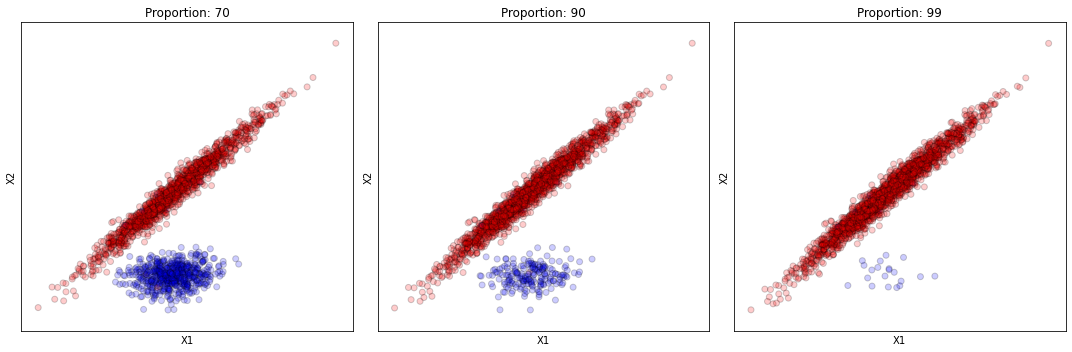

======== DATASET  1  ========


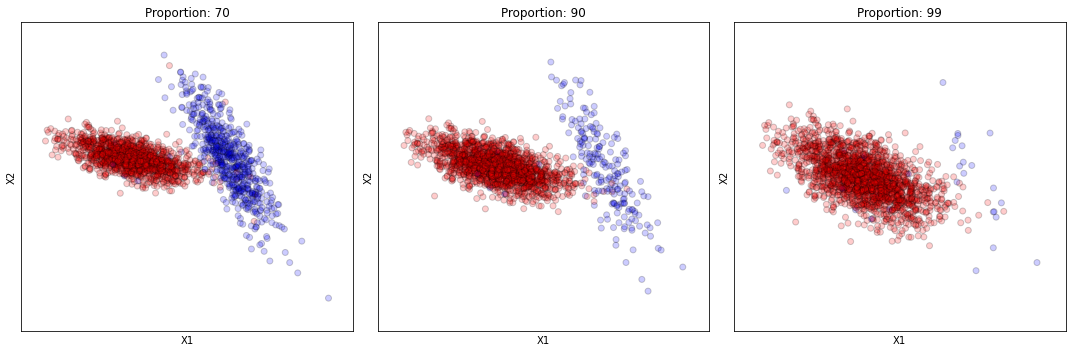

======== DATASET  2  ========


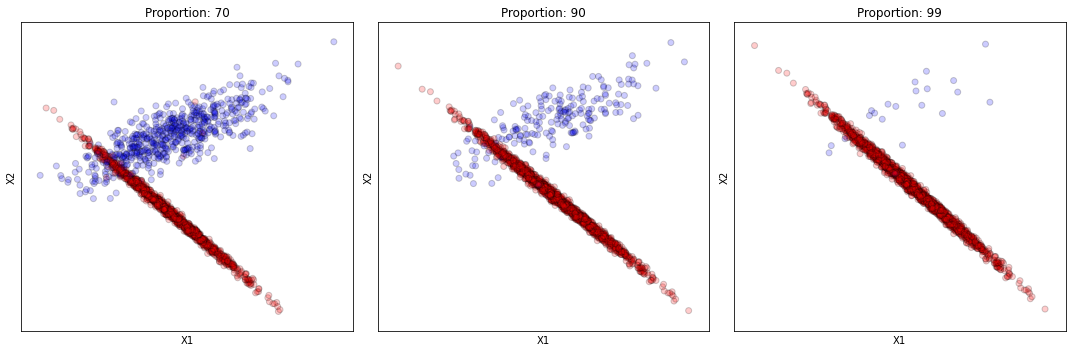

In [3]:
dfs = load_dfs()
proportions = [70, 90, 99]
datasets = []
for i in range(3):
    print("=============================")
    print("======== DATASET ", i, " ========")
    print("=============================")
    dataset = [dfs['df0'+str(i)+'_'+str(prop)] for prop in proportions]
    datasets.append(dataset)
    plot_datasets(dataset)

In [4]:
def evaluate(model, X_val, y_val):
    acc = model.score(X_val, y_val)
    print("Accuracy: %.3f" %acc)
    
    preds = model.predict(X_val)
    # Proportion of pos and neg in reality 
    tot_pos = np.count_nonzero(y_val == 1)
    tot_neg = np.count_nonzero(y_val == 0)
    # Predicted 'pos' but 'neg' in reality
    false_pos = np.count_nonzero(np.logical_and(preds != y_val, y_val == 0) )
    # Predicted 'neg' but 'pos' in reality
    false_neg = np.count_nonzero(np.logical_and(preds != y_val, y_val == 1) )

    print('Total predictions:    ', len(y_val))
    print('Ratio positive/total:  %.3f' %(tot_pos/len(y_val)))
    print("False positive:       ", false_pos)
    print("False negative:       ", false_neg)
    print('Ratio of positive that are not detected: %.3f' %(false_neg/tot_pos))
    print('Ratio of negative that are not detected: %.3f' %(false_pos/tot_neg))

## SVC with no preprocessing

Here we use a SVM with a RBF kernel to classify the data
The decision boundaries now appear on the plots

**QUESTIONS**

Run the code below and answer the following questions:

1. Does the accuracy seem good for each dataset and each proportion of negative?
2. Does the ratio of false negative seem reasonable for each dataset and each proportion?
3. Is the accuracy misleading? For each proportion give the accuracy that a classifier labeling all datapoints to the majority class would get
4. Look at dataset 0, does the fact that the data is imbalanced seem to have an influence on the performance? 
5. Same question but with dataset 1 and 2


======== DATASET  0  ========


======== proportion:  70  ========


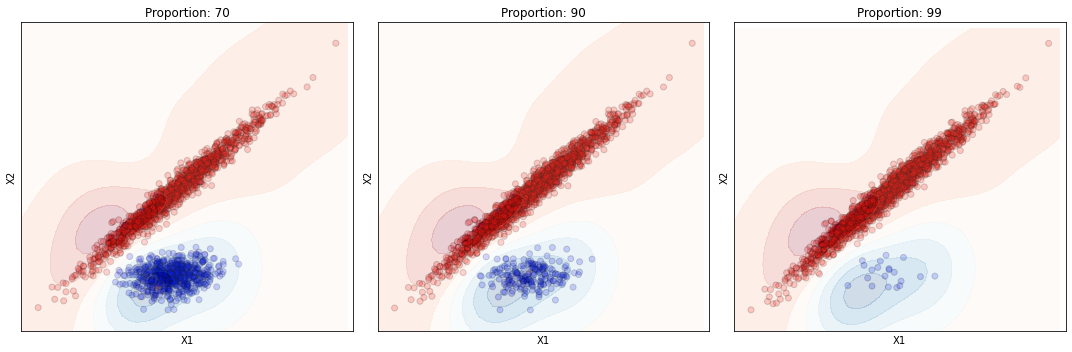

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.313
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.021
Ratio of negative that are not detected: 0.005

======== proportion:  90  ========


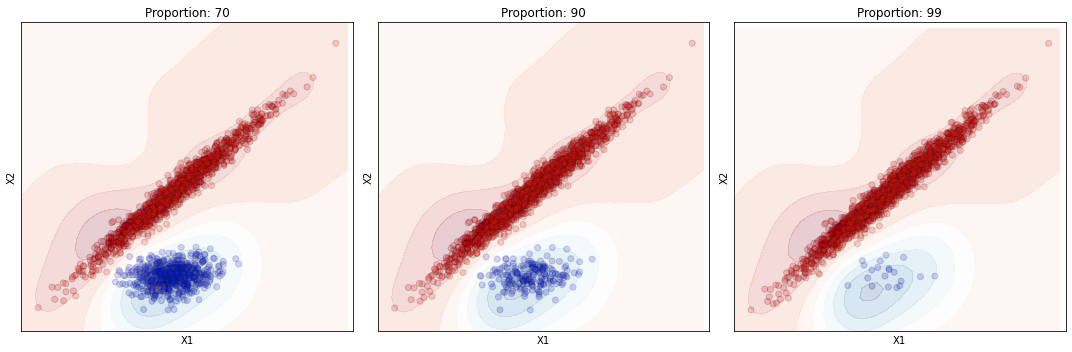

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.117
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.057
Ratio of negative that are not detected: 0.004

======== proportion:  99  ========


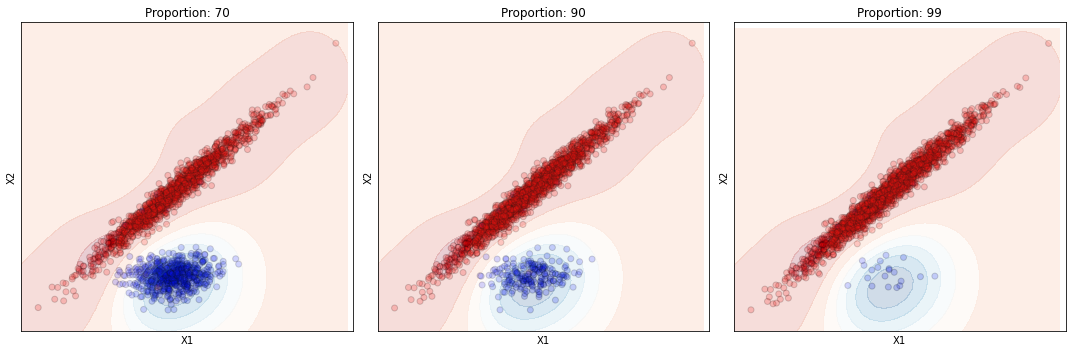

Accuracy: 0.993
Total predictions:     300
Ratio positive/total:  0.027
False positive:        0
False negative:        2
Ratio of positive that are not detected: 0.250
Ratio of negative that are not detected: 0.000

======== DATASET  1  ========


======== proportion:  70  ========


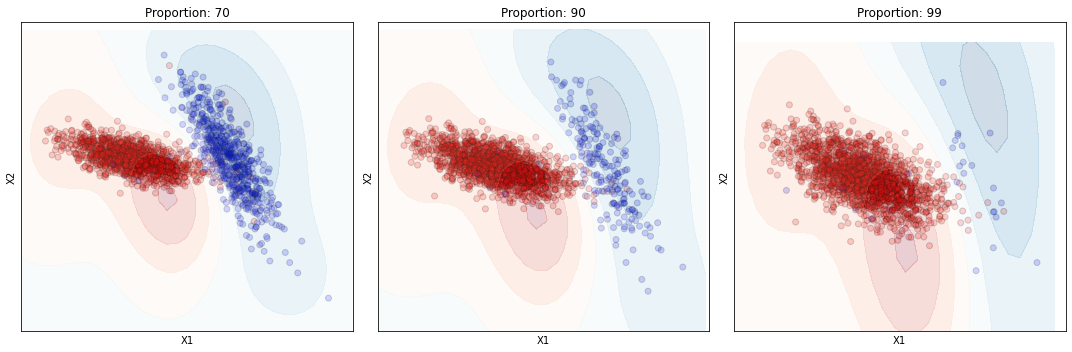

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.307
False positive:        0
False negative:        3
Ratio of positive that are not detected: 0.033
Ratio of negative that are not detected: 0.000

======== proportion:  90  ========


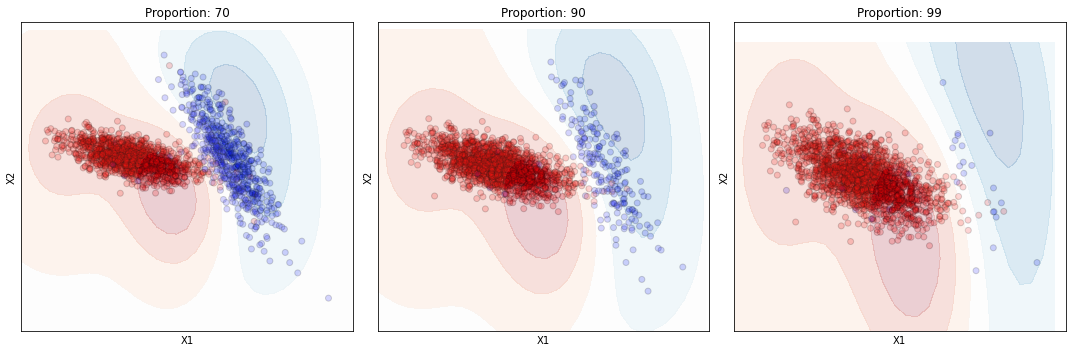

Accuracy: 0.993
Total predictions:     300
Ratio positive/total:  0.090
False positive:        1
False negative:        1
Ratio of positive that are not detected: 0.037
Ratio of negative that are not detected: 0.004

======== proportion:  99  ========


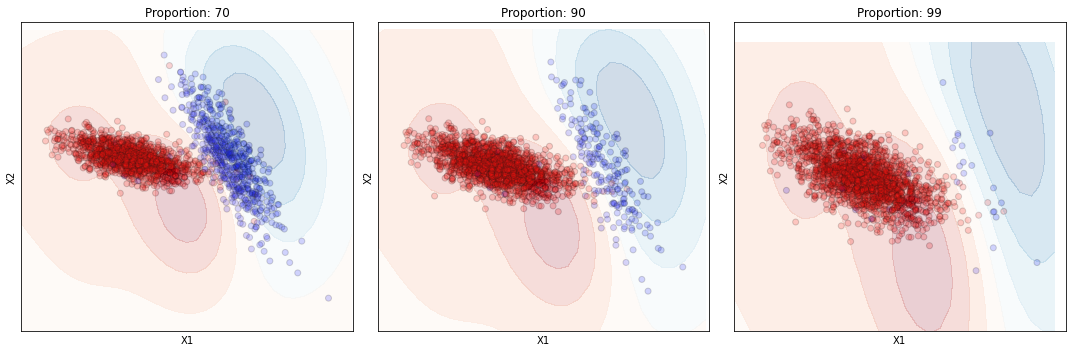

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.013
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.500
Ratio of negative that are not detected: 0.003

======== DATASET  2  ========


======== proportion:  70  ========


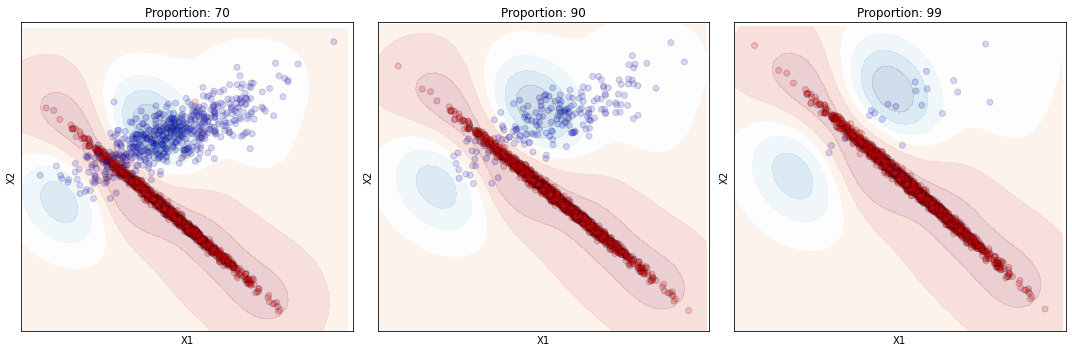

Accuracy: 0.947
Total predictions:     300
Ratio positive/total:  0.373
False positive:        0
False negative:        16
Ratio of positive that are not detected: 0.143
Ratio of negative that are not detected: 0.000

======== proportion:  90  ========


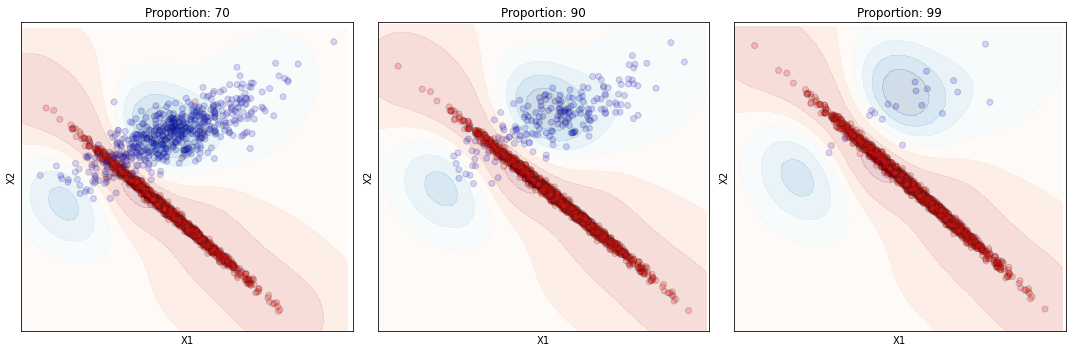

Accuracy: 0.987
Total predictions:     300
Ratio positive/total:  0.103
False positive:        0
False negative:        4
Ratio of positive that are not detected: 0.129
Ratio of negative that are not detected: 0.000

======== proportion:  99  ========


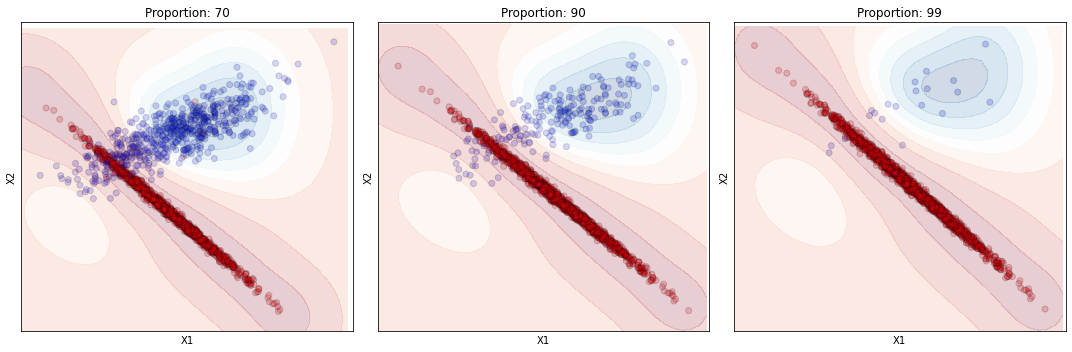

Accuracy: 0.980
Total predictions:     300
Ratio positive/total:  0.033
False positive:        0
False negative:        6
Ratio of positive that are not detected: 0.600
Ratio of negative that are not detected: 0.000


In [5]:
for i, dataset in enumerate(datasets):
    print("\n=============================")
    print("======== DATASET ", i, " ========")
    print("=============================\n")
    for j, df in enumerate(dataset):
        print("\n======== proportion: ", proportions[j], " ========")
        X = np.array(df[['X1', 'X2']])
        y = np.array(df['y'])
        X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=.5, random_state=42)

        model = SVC(gamma='auto')
        model.fit(X_train, y_train)
        plot_datasets(dataset,model)

        evaluate(model, X_val, y_val)


## SVC using downsampling

**QUESTIONS**

1. Write a function ``down_sampling`` that takes as input an imbalanced dataset ``X`` and ``y`` and returns ``X_down, y_down``: a subsample of ``X`` and ``y`` such that only ``tot_pos`` negative elements are kept (on top of all the positive elements); ``tot_pos`` being the total number of ``1`` in ``y``

2. Once the function ``down_sampling`` is completed: call it on each of your train datasets in the cell below

3. Run the cell below and answer the following questions:

  1. Compare visualy the boundaries with and without downsampling. What do you observe?
  2. Is there a significant change regarding the accuracy?
  3. Same question with the ratio of positive that are not detected.


======== DATASET  0  ========


======== proportion:  70  ========


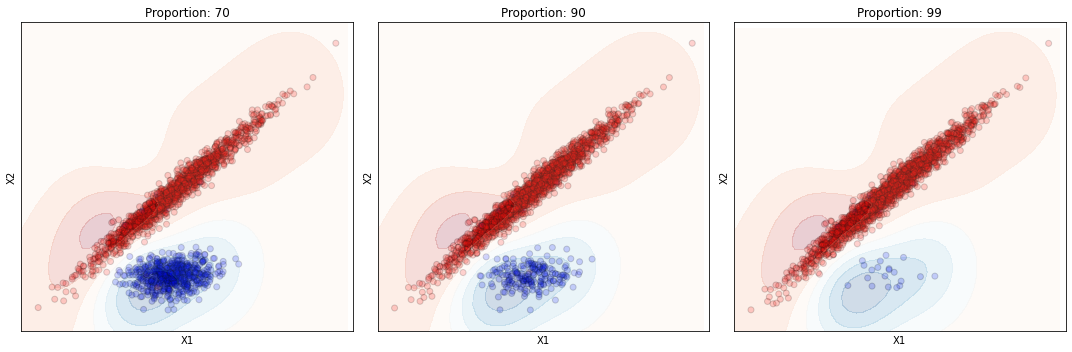

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.313
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.021
Ratio of negative that are not detected: 0.005

======== proportion:  90  ========


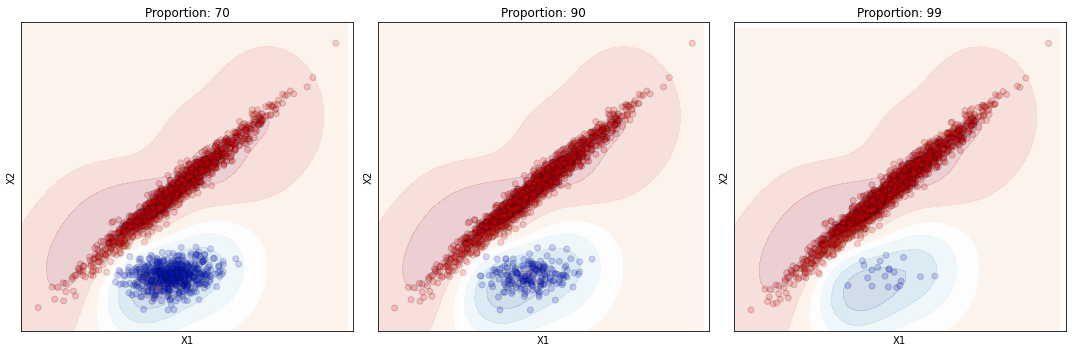

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.117
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.057
Ratio of negative that are not detected: 0.004

======== proportion:  99  ========


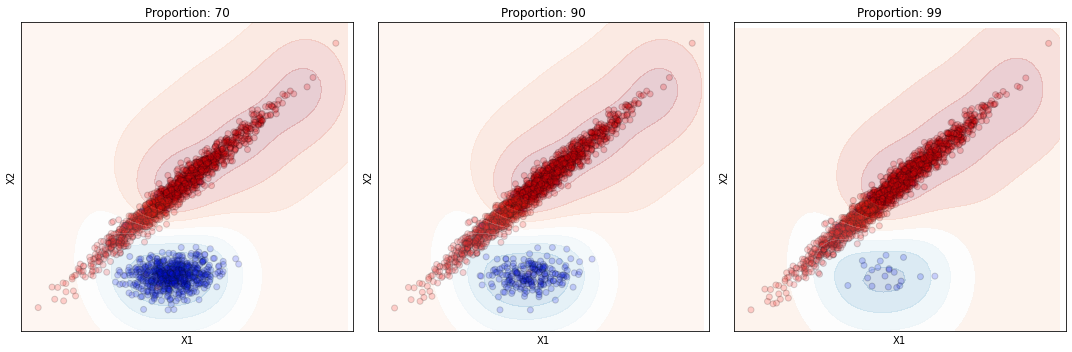

Accuracy: 0.783
Total predictions:     300
Ratio positive/total:  0.027
False positive:        63
False negative:        2
Ratio of positive that are not detected: 0.250
Ratio of negative that are not detected: 0.216

======== DATASET  1  ========


======== proportion:  70  ========


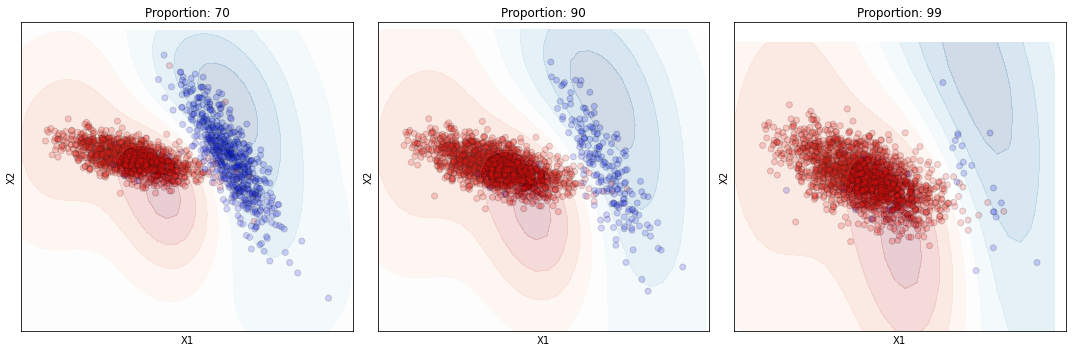

Accuracy: 0.993
Total predictions:     300
Ratio positive/total:  0.307
False positive:        0
False negative:        2
Ratio of positive that are not detected: 0.022
Ratio of negative that are not detected: 0.000

======== proportion:  90  ========


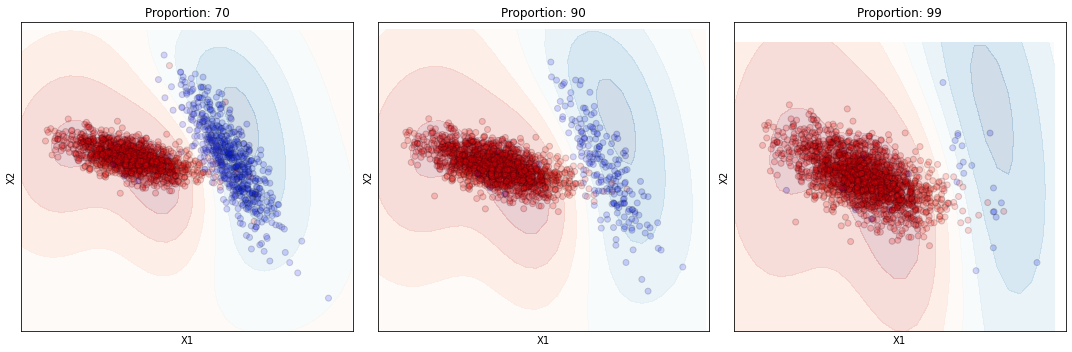

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.090
False positive:        2
False negative:        1
Ratio of positive that are not detected: 0.037
Ratio of negative that are not detected: 0.007

======== proportion:  99  ========


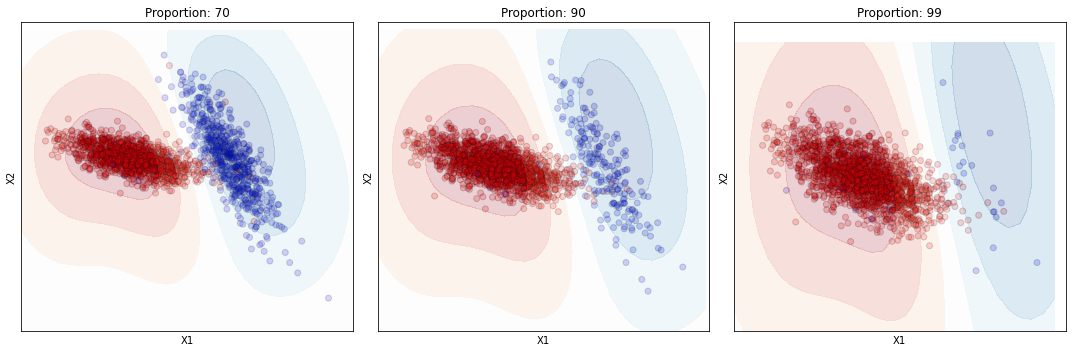

Accuracy: 0.973
Total predictions:     300
Ratio positive/total:  0.013
False positive:        7
False negative:        1
Ratio of positive that are not detected: 0.250
Ratio of negative that are not detected: 0.024

======== DATASET  2  ========


======== proportion:  70  ========


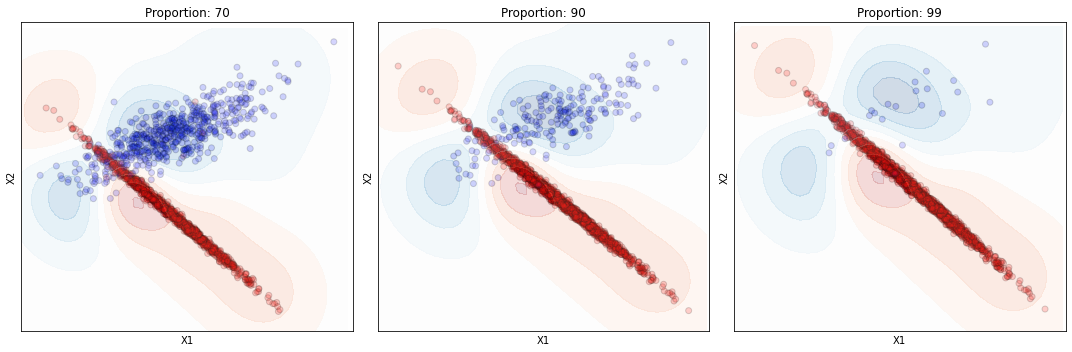

Accuracy: 0.937
Total predictions:     300
Ratio positive/total:  0.373
False positive:        12
False negative:        7
Ratio of positive that are not detected: 0.062
Ratio of negative that are not detected: 0.064

======== proportion:  90  ========


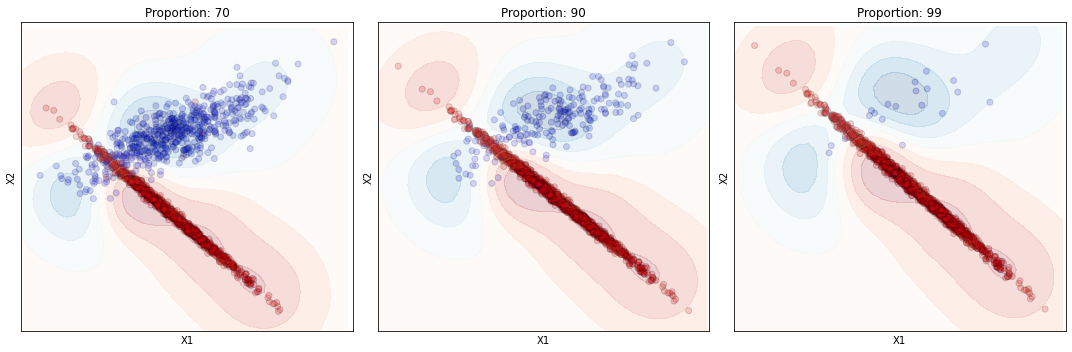

Accuracy: 0.943
Total predictions:     300
Ratio positive/total:  0.103
False positive:        15
False negative:        2
Ratio of positive that are not detected: 0.065
Ratio of negative that are not detected: 0.056

======== proportion:  99  ========


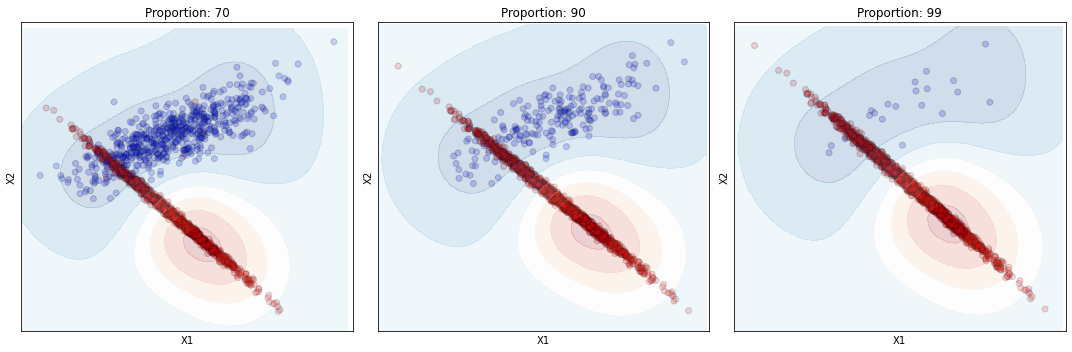

Accuracy: 0.627
Total predictions:     300
Ratio positive/total:  0.033
False positive:        111
False negative:        1
Ratio of positive that are not detected: 0.100
Ratio of negative that are not detected: 0.383


In [6]:
def down_sampling(X, y):
    """
    Remove occurences of negative labels
    """
    # Count the total number of positive elements
    tot_pos = np.count_nonzero(y==1)
    
    idx_neg = np.where(y == 0)[0]
    idx_pos = np.where(y == 1)[0]
    # Shuffle idx_neg in place
    np.random.shuffle(idx_neg)
    
    idx_neg = idx_neg[:tot_pos]
    idx = np.sort(np.concatenate([idx_pos, idx_neg], axis=None))
    X_down, y_down = X[idx], y[idx]
    return(X_down, y_down)

for i, dataset in enumerate(datasets):
    print("\n=============================")
    print("======== DATASET ", i, " ========")
    print("=============================\n")
    for j, df in enumerate(dataset):
        print("\n======== proportion: ", proportions[j], " ========")
        X = np.array(df[['X1', 'X2']])
        y = np.array(df['y'])   
        X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=.5, random_state=42)
        X_train, y_train = down_sampling(X_train,y_train)

        model = SVC(gamma="auto")
        model.fit(X_train, y_train)
        plot_datasets(dataset,model)

        evaluate(model, X_val, y_val)

## SVC using upsampling

**QUESTIONS**


1. Write a function ``up_sampling`` that takes as input an imbalanced dataset ``X`` and ``y`` and returns ``X_up, y_up``. ``X_up, y_up`` is generated from ``X`` and ``y`` by repeating occurences of positive datapoints until there are ``tot_neg`` positive elements (on top of all the negative elements); ``tot_neg`` being the total number of ``0`` in ``y``

2. Once the function ``up_sampling`` is completed: call it on each of your train datasets in the cell below

3. Run the cell below and answer the following questions:

  1. Compare visualy the boundaries with downsampling/upsampling and without preprocessing. What do you observe?
  2. Is there a significant change regarding the accuracy?
  3. Same question with the ratio of positive that are not detected.


======== DATASET  0  ========


======== proportion:  70  ========


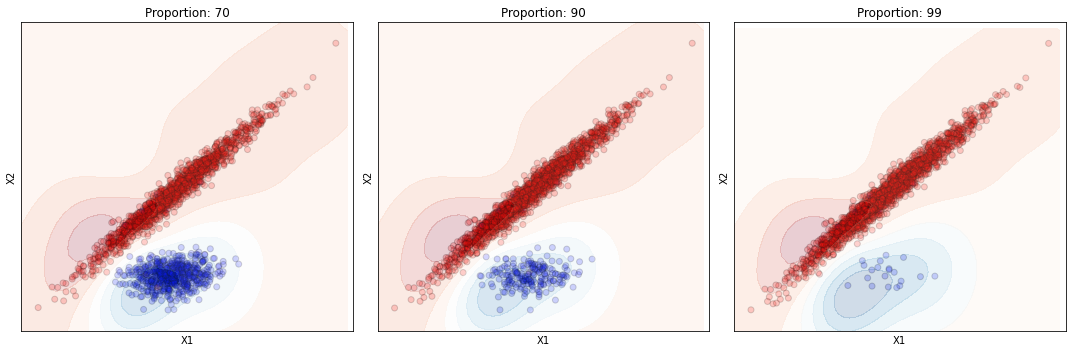

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.313
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.021
Ratio of negative that are not detected: 0.005

======== proportion:  90  ========


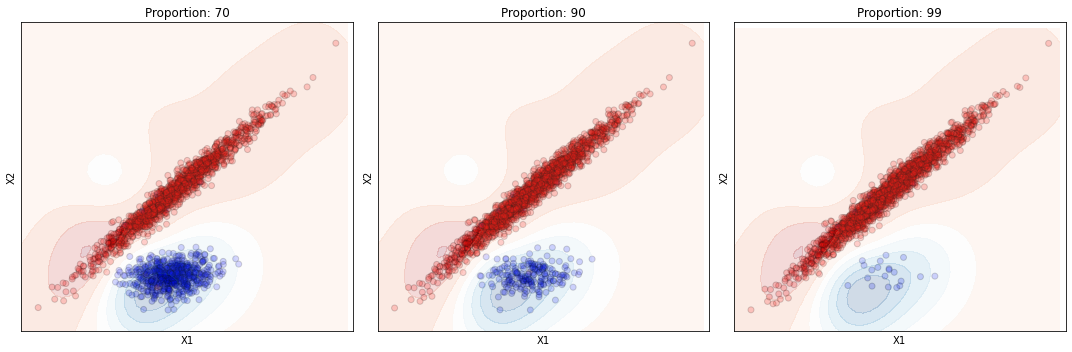

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.117
False positive:        1
False negative:        2
Ratio of positive that are not detected: 0.057
Ratio of negative that are not detected: 0.004

======== proportion:  99  ========


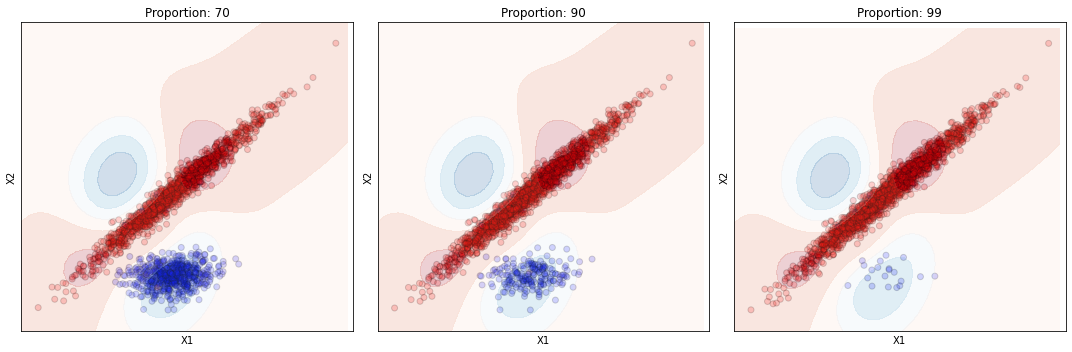

Accuracy: 0.960
Total predictions:     300
Ratio positive/total:  0.027
False positive:        10
False negative:        2
Ratio of positive that are not detected: 0.250
Ratio of negative that are not detected: 0.034

======== DATASET  1  ========


======== proportion:  70  ========


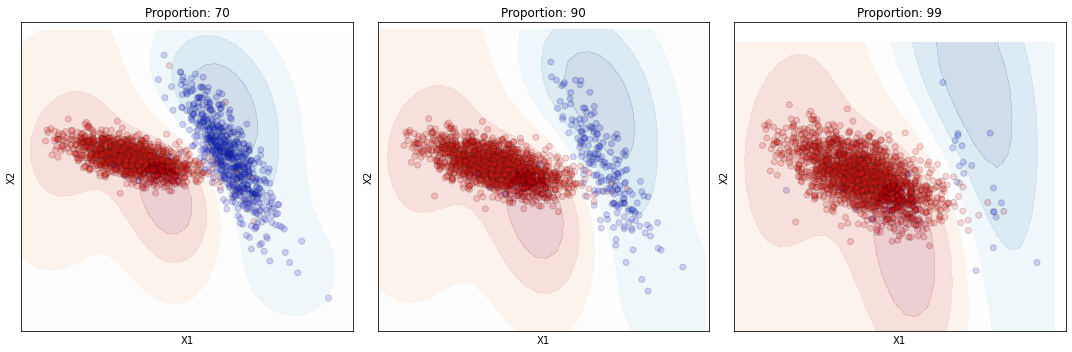

Accuracy: 0.993
Total predictions:     300
Ratio positive/total:  0.307
False positive:        0
False negative:        2
Ratio of positive that are not detected: 0.022
Ratio of negative that are not detected: 0.000

======== proportion:  90  ========


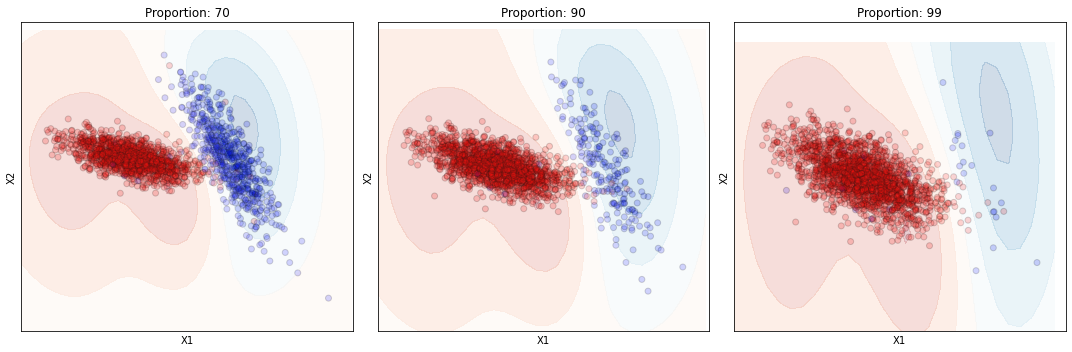

Accuracy: 0.990
Total predictions:     300
Ratio positive/total:  0.090
False positive:        2
False negative:        1
Ratio of positive that are not detected: 0.037
Ratio of negative that are not detected: 0.007

======== proportion:  99  ========


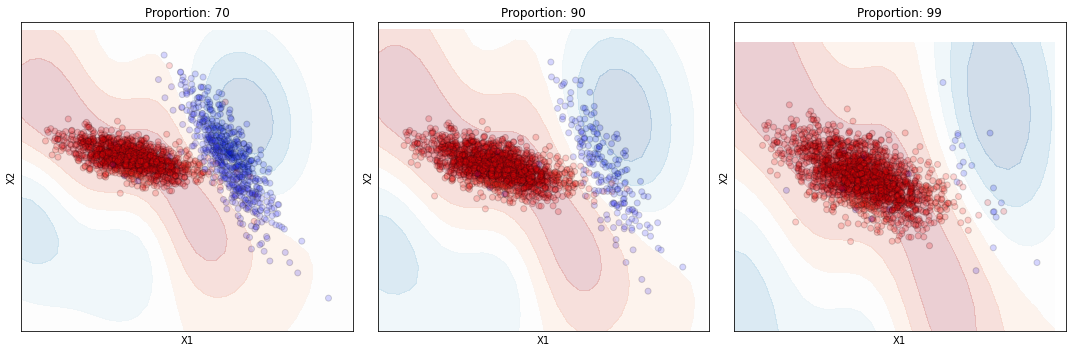

Accuracy: 0.987
Total predictions:     300
Ratio positive/total:  0.013
False positive:        2
False negative:        2
Ratio of positive that are not detected: 0.500
Ratio of negative that are not detected: 0.007

======== DATASET  2  ========


======== proportion:  70  ========


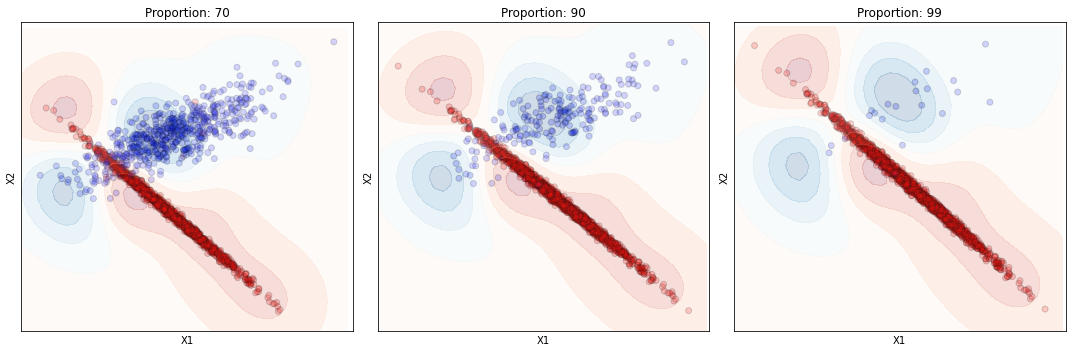

Accuracy: 0.957
Total predictions:     300
Ratio positive/total:  0.373
False positive:        6
False negative:        7
Ratio of positive that are not detected: 0.062
Ratio of negative that are not detected: 0.032

======== proportion:  90  ========


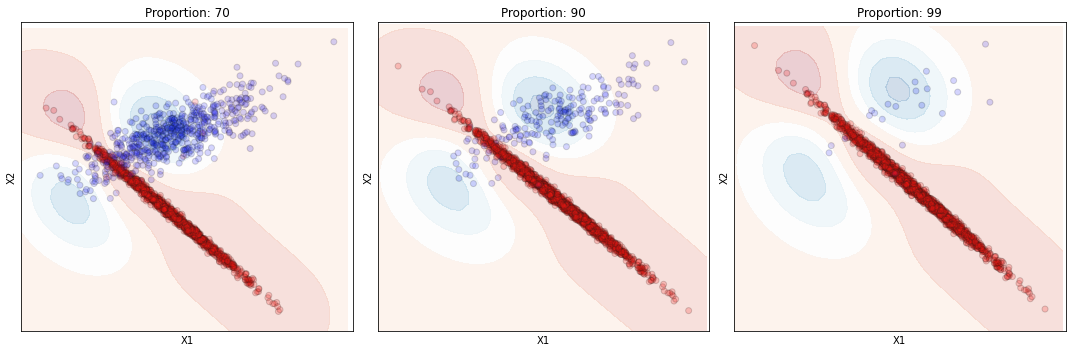

Accuracy: 0.987
Total predictions:     300
Ratio positive/total:  0.103
False positive:        0
False negative:        4
Ratio of positive that are not detected: 0.129
Ratio of negative that are not detected: 0.000

======== proportion:  99  ========


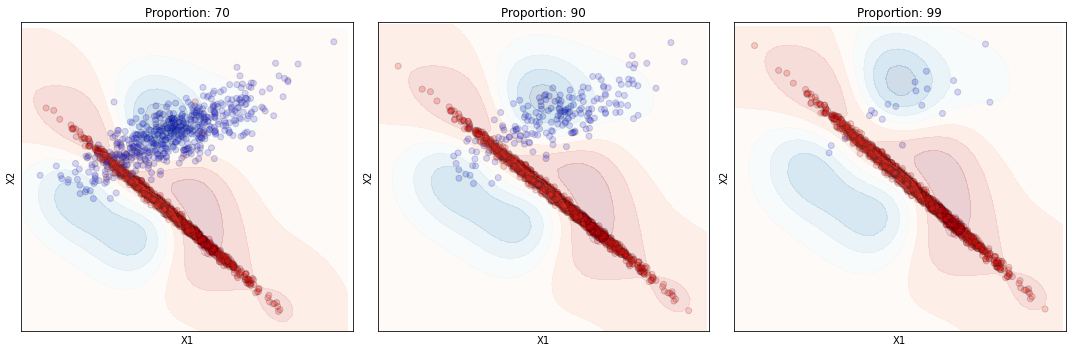

Accuracy: 0.983
Total predictions:     300
Ratio positive/total:  0.033
False positive:        1
False negative:        4
Ratio of positive that are not detected: 0.400
Ratio of negative that are not detected: 0.003


In [7]:
def up_sampling(X, y):
    """
    Add occurences of positive labels
    """
    # Count the total number of negative elements
    tot_neg = np.count_nonzero(y==0)
    idx_neg = np.where(y == 0)[0]
    idx_pos = np.where(y == 1)[0]

    # Create as many positive labels as negative ones
    idx_pos = np.random.choice(idx_pos, tot_neg)

    idx = np.sort(np.concatenate([idx_pos, idx_neg], axis=None))
    np.random.shuffle(idx)
    X_up, y_up = X[idx], y[idx]
    return(X_up, y_up)

for i, dataset in enumerate(datasets):
    print("\n=============================")
    print("======== DATASET ", i, " ========")
    print("=============================\n")
    for j, df in enumerate(dataset):
        print("\n======== proportion: ", proportions[j], " ========")
        X = np.array(df[['X1', 'X2']])
        y = np.array(df['y'])   
        X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=.5, random_state=42)
        X_train, y_train = up_sampling(X_train,y_train)

        model = SVC(gamma="auto")
        model.fit(X_train, y_train)
        plot_datasets(dataset,model)

        evaluate(model, X_val, y_val)